# Quiz. Доверительные интервалы для доли

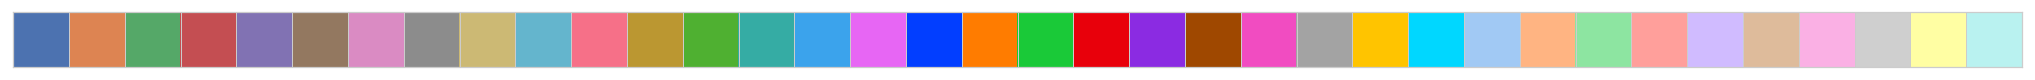

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from contextlib import contextmanager

sns.set()
sns.set_style("whitegrid")

color_palette = sns.color_palette('deep') + sns.color_palette('husl', 6) + sns.color_palette('bright') + sns.color_palette('pastel')

%matplotlib inline
sns.palplot(color_palette)

def ndprint(a, precision=3):
    with np.printoptions(precision=precision, suppress=True):
        print(a)

## 02. Normal interval

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [29]:
from statsmodels.stats.proportion import proportion_confint

n = 50
success_cnt = 1

normal_interval = proportion_confint(success_cnt, n, alpha=0.05, method = 'normal')
print normal_interval

print round(normal_interval[0], 4)

(0.0, 0.05880530708179099)
0.0


Так как текущая реализация метода `proportion_confint` клипает интервал, чтобы он был в (0, 1), берем его исходники

In [30]:
def proportion_confint_2(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sts.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

n = 50
success_cnt = 1

normal_interval = proportion_confint_2(success_cnt, n, alpha=0.05, method = 'normal')
print normal_interval

print round(normal_interval[0], 4)

(-0.018805307081790987, 0.05880530708179099)
-0.0188


## 03. Wilson interval

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [12]:
wilson_interval = proportion_confint(success_cnt, n, alpha=0.05, method = 'wilson')
print wilson_interval

print round(wilson_interval[0], 4)

(0.003539259271646236, 0.10495443589637815)
0.0035


## 04. Which is better

Какой из двух построенных доверительных интервалов выглядит более вменяемым, учитывая, что параметр, для которого строится оценка, меняется от 0 до 1?

__answered__ wilson

## 05. Sample size

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?

In [15]:
from statsmodels.stats.proportion import samplesize_confint_proportion

general_mean = 0.02
margin_of_err = 0.01

n_samples = samplesize_confint_proportion(general_mean, margin_of_err, alpha=0.05, method='normal')
n_samples = int(np.ceil(n_samples))
n_samples

753

## 05. Sample sizes chart

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?

9604

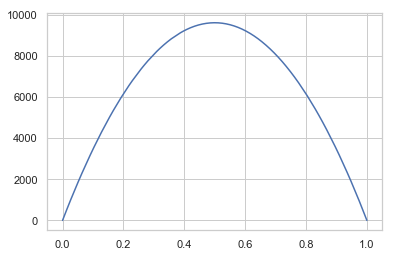

In [26]:
def get_sample_size(proportion, margin_of_err=0.01, alpha=0.05):
    n_samples = samplesize_confint_proportion(proportion, margin_of_err, alpha=alpha, method='normal')
    n_samples = int(np.ceil(n_samples))
    return n_samples

proportions = np.linspace(0., 1., 1000)
sample_sizes = np.array(list(map(get_sample_size, proportions)))

plt.plot(proportions, sample_sizes)

np.max(sample_sizes)